In [48]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
low_memory=False

path = input("Enter path to B-SOID ouput pose labels file:")
file = input("Enter filename:")

df = pd.read_csv(path + "\\" + file)

#fig = px.line(df, x = 'Frame', y = 'Labels', title='B-SOID labels over time')
#fig.show()

Enter path to B-SOID ouput pose labels file: C:\Users\McCormick Lab\Documents\Python\B-SOID\3056_200924_E235_2_lft_Oct1521\_2\BSOID
Enter filename: Oct-15-2021labels_pose_30Hzlft_cam_2_concat_80min_cropDLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.csv


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236) have mixed types. Specify dtype option on import or set low

In [49]:
df

,Frame,Labels,scorer,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.1,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.2,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.3,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.4,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.5,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.6,...,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.224,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.225,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.226,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.227,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.228,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.229,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.230,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.231,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.232,DLC_resnet50_3056_200924_E235_1_lftAug17shuffle1_650000.233
0,0,5,bodyparts,headpost1,headpost1,headpost1,headpost2,headpost2,headpost2,headpost3,...,pplVentral,pplCenter,pplCenter,pplCenter,neckAnterior,neckAnterior,neckAnterior,neckPosterior,neckPosterior,neckPosterior
1,1,5,coords,x,y,likelihood,x,y,likelihood,x,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,2,5,0,525.9581299,28.94238663,0.99896872,670.2857056,111.0917358,0.999755919,739.9437256,...,0.998864055,359.3132324,74.46678162,0.999834299,348.6395264,310.9272156,0.988913119,525.2976685,316.9357605,0.190648496
3,3,5,1,526.2999268,29.42940903,0.998478234,669.934082,111.1409836,0.999722302,739.5360718,...,0.999029279,358.835022,74.840271,0.99986577,347.4438171,311.0716553,0.970674038,520.1110229,319.2805481,0.540242136
4,4,5,2,526.3782349,29.24937248,0.998722494,669.6473999,110.7917175,0.999573767,739.5332642,...,0.998503685,358.1618958,74.66779327,0.999838948,345.6607361,312.3429565,0.981521547,519.4968872,320.7054138,0.286346823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143997,143997,5,143995,524.278,28.2538,0.999754,674.588,112.758,0.999924,738.075,...,0.99893,359.12,76.7737,0.996806,311.408,302.704,0.986731,508.743,336.842,0.99306
143998,143998,5,143996,524.268,28.3501,0.999767,674.67,112.804,0.999925,737.564,...,0.999086,359.29,76.7749,0.997049,310.91,302.338,0.990399,509.479,337.102,0.989066
143999,143999,5,143997,524.258,28.3984,0.999771,674.732,112.837,0.999925,737.78,...,0.99904,359.327,76.6228,0.997165,311.281,302.365,0.99364,509.543,336.329,0.989994
144000,144000,5,143998,524.411,28.2109,0.999765,674.854,112.881,0.999924,737.694,...,0.999019,359.231,76.7023,0.997014,311.029,301.904,0.995473,508.66,336.515,0.993118


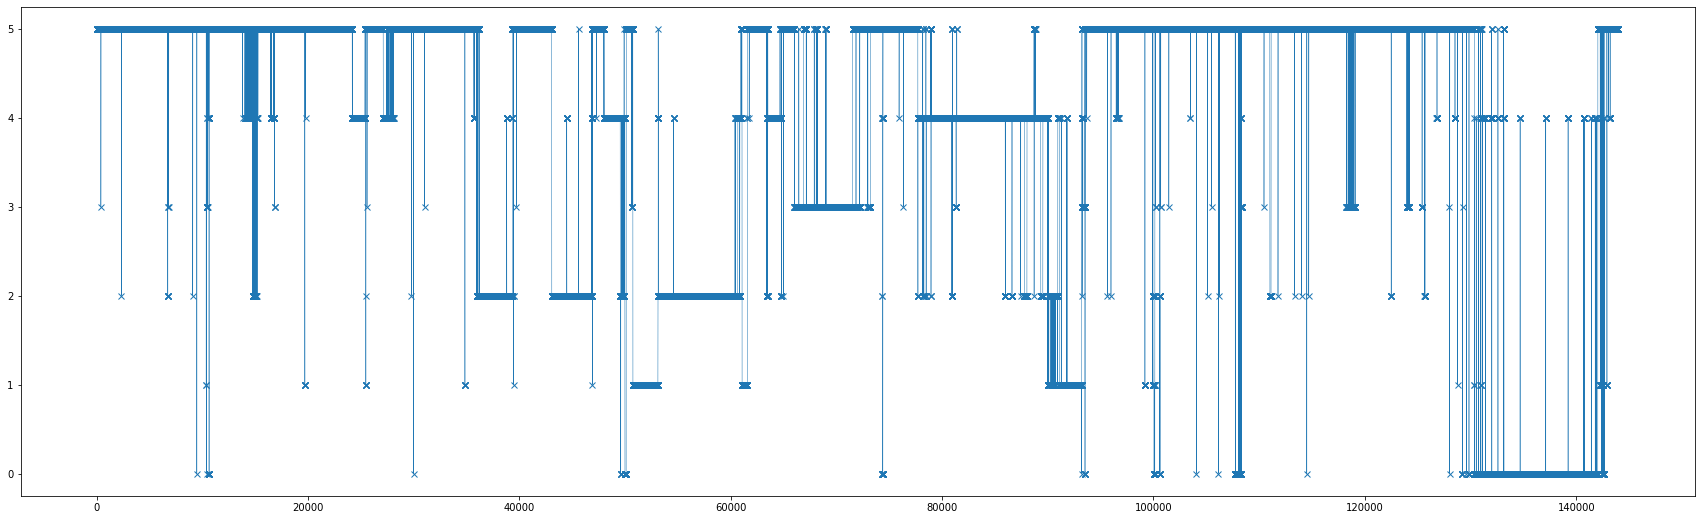

In [50]:
plt.rcParams["figure.figsize"] =(30,9) 
plt.plot(df.Frame,df.Labels,linewidth=0.5,marker="x")

In [46]:
from scipy.ndimage.filters import gaussian_filter1d
lab_smth = gaussian_filter1d(df.Labels[0:162000], sigma=60)

time_sec=(df.Frame[0:162000]/3)/10
time_min=time_sec/60

In [1]:
print(time_min.shape)

NameError: name 'time_min' is not defined

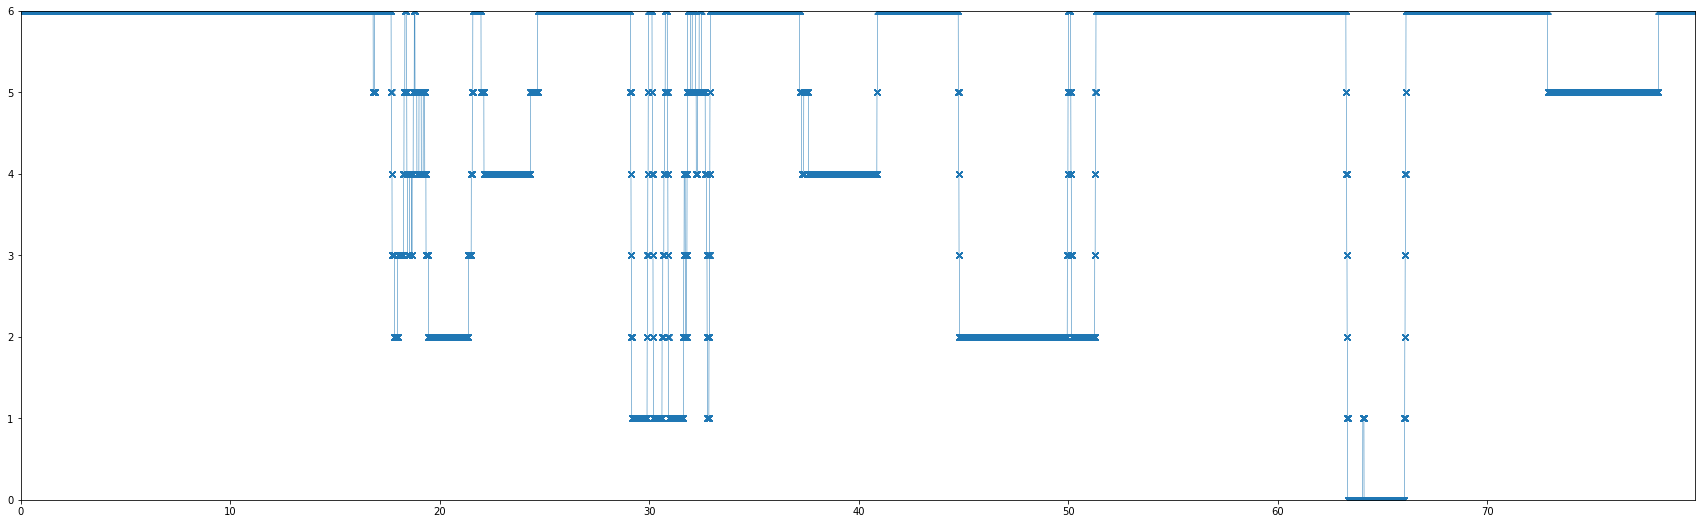

In [51]:
plt.plot(time_min,lab_smth,linewidth=0.5,marker="x")
plt.xlim(min(time_min),max(time_min))
plt.ylim(0,max(lab_smth))
plt.savefig('bsoid_labels_pose_ex.png')

In [227]:
import numpy as np

rCnt = int(input ("How many raster groups to import?"))
path = input("Enter path to rasterMap group:")
file = input("Enter base filename:")

for i in range(0,rCnt):
    df = pd.read_csv(path + "\\" + file + '_grp' + str(i) + '.csv')
    if i==0:
        raster_sec=(df.x0000/3.38)
        raster_min=raster_sec/60
        grp = np.zeros((rCnt,len(raster_min)))
    grp[i,:] = gaussian_filter1d(df.y0000, sigma=67.6)

How many raster groups to import? 7
Enter path to rasterMap group: C:\Users\McCormick Lab\Documents\Python\neurobehavioral_cluster_alignment\3056_200924_E235_1
Enter base filename: 3056_200924_E235_1


In [228]:
j=0
j=int(j)
lab_sw=np.zeros((len(lab_smth)))
for i in range(0,len(lab_smth)-1):
    if lab_smth[i]!=lab_smth[j]:
        lab_sw[i]=1
    j=i

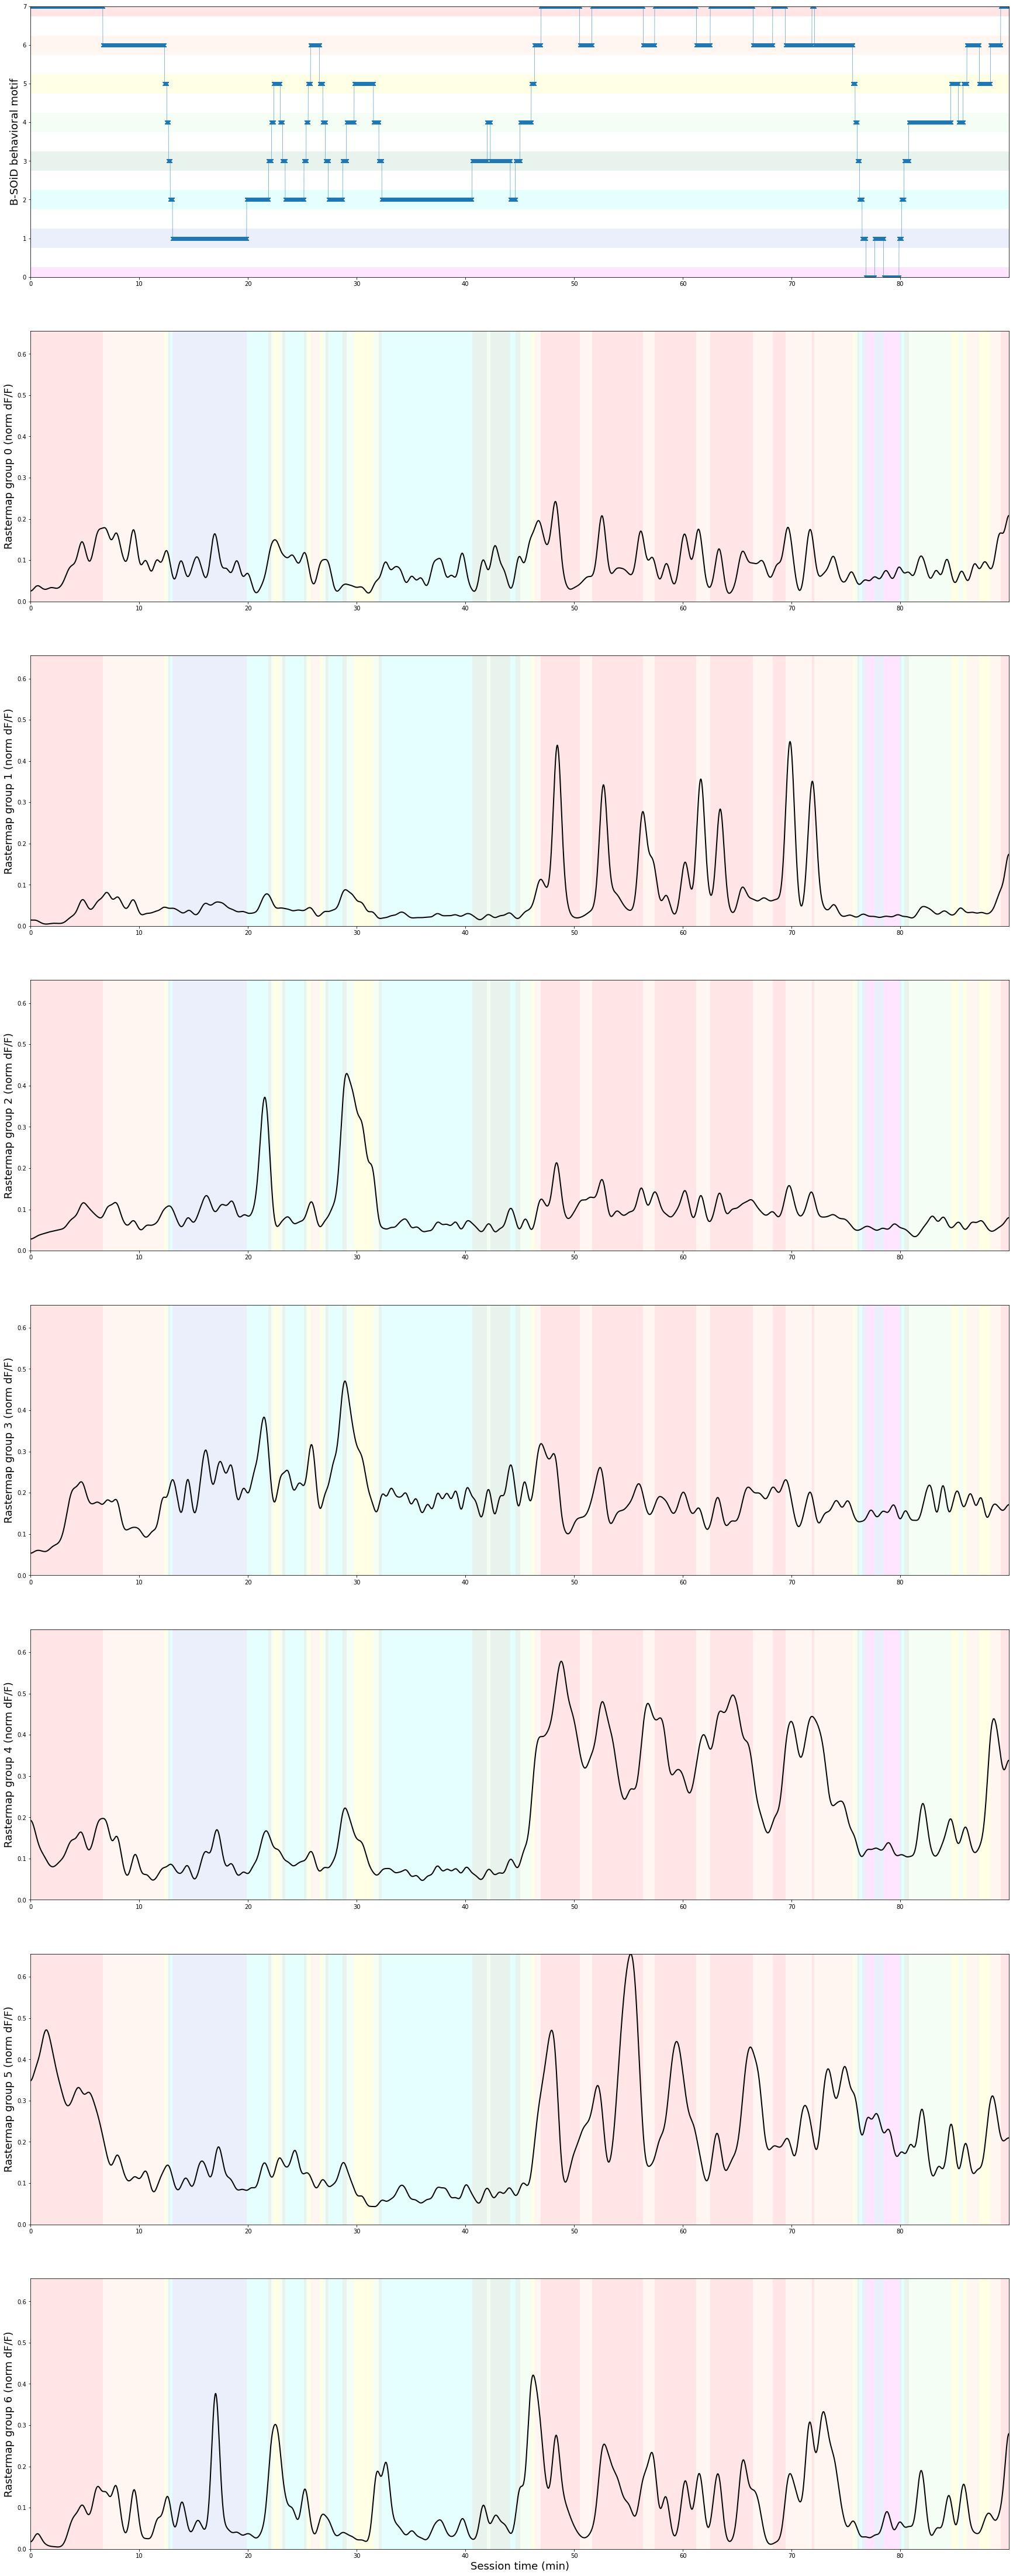

In [229]:
import math as m

fig = plt.figure(figsize=(30,10+(10*rCnt)))
#######################
axy = fig.add_subplot(1+rCnt,1,1)

plt.plot(time_min,lab_smth,linewidth=0.5,marker="x")
plt.ylabel('B-SOiD behavioral motif',fontsize=18)
axy.set_xlim(min(time_min),max(time_min))
axy.set_ylim(0,max(lab_smth))

for k in range(0,int(max(lab_smth)+1)):
    if k==0:
        color='magenta'
    elif k==1:
        color='royalblue'
    elif k==2:
        color='aqua'
    elif k==3:
        color='seagreen'
    elif k==4:
        color='palegreen'
    elif k==5:
        color='yellow'
    elif k==6:
        color='lightsalmon'
    elif k==7:
        color='red'
    box_y_min=(k/max(lab_smth))*max(lab_smth)-0.5
    box_y_max=((k+1)/max(lab_smth))*max(lab_smth)-0.5
    rectangle = plt.Rectangle((0,box_y_min+0.25), max(time_min), 0.5,fc=color,alpha=0.1)
    plt.gca().add_patch(rectangle)

#######################
y_super_max=0
for rasta_num in range(0,rCnt):
    if max(grp[rasta_num,:])>y_super_max:
        y_super_max=max(grp[rasta_num,:])
for rasta_num in range(0,rCnt):
    axz = fig.add_subplot(1+rCnt,1,2+rasta_num)

    plt.plot(raster_min,grp[rasta_num,:],linewidth=2.0,color='black')
    plt.xlim(min(time_min),max(time_min))
    plt.ylim(0,y_super_max)
    plt.ylabel('Rastermap group '+ str(rasta_num) + ' (norm dF/F)',fontsize=18)
    i=0
    j=0
    for i in range(0,len(lab_smth)):
        if lab_sw[i]==1:
            count=count+1
            if i<len(lab_smth):
                if lab_smth[i-1]==0:
                    color='magenta'
                elif lab_smth[i-1]==1:
                    color='royalblue'
                elif lab_smth[i-1]==2:
                    color='aqua'
                elif lab_smth[i-1]==3:
                    color='seagreen'
                elif lab_smth[i-1]==4:
                    color='palegreen'
                elif lab_smth[i-1]==5:
                    color='yellow'
                elif lab_smth[i-1]==6:
                    color='lightsalmon'
                elif lab_smth[i-1]==7:
                    color='red'
                rectangle = plt.Rectangle((j/1800,0), (i/1800)-(j/1800), y_super_max,fc=color,alpha=0.1)
                plt.gca().add_patch(rectangle)
                j=i
        if i==len(lab_smth)-1:
            if lab_smth[i-1]==0:
                color='magenta'
            elif lab_smth[i-1]==1:
                color='royalblue'
            elif lab_smth[i-1]==2:
                color='aqua'
            elif lab_smth[i-1]==3:
                color='seagreen'
            elif lab_smth[i-1]==4:
                color='palegreen'
            elif lab_smth[i-1]==5:
                color='yellow'
            elif lab_smth[i-1]==6:
                color='lightsalmon'
            elif lab_smth[i-1]==7:
                color='red'
            rectangle = plt.Rectangle((j/1800,0), (i/1800)-(j/1800), y_super_max,fc=color,alpha=0.1)
            plt.gca().add_patch(rectangle)
        if rasta_num==rCnt-1:
            plt.xlabel('Session time (min)',fontsize=18)
    plt.savefig(path+'\\bsoid_labels_3056_210924_1_raster_group'+str(rasta_num)+'.png')

162002

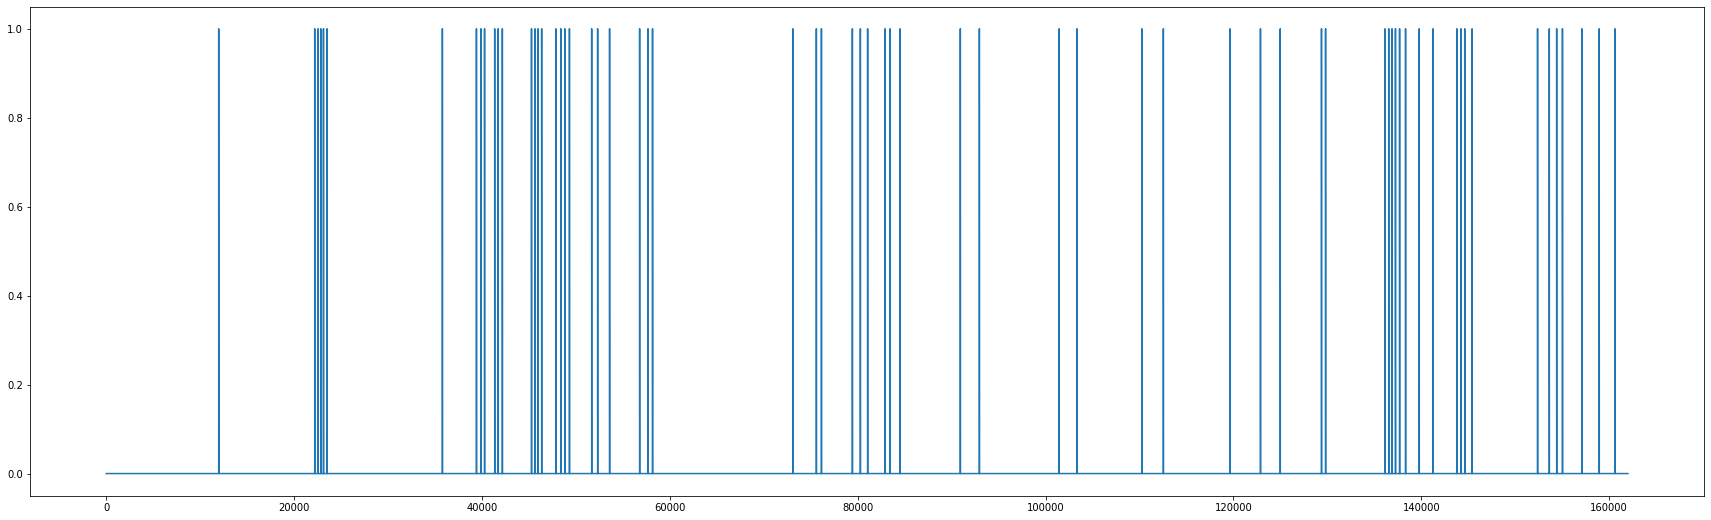

In [22]:
plt.plot(lab_sw)

In [63]:
print(len(lab_smth)-1)

162001


In [24]:
j

160622

In [73]:
max(time_min)

79.88214990138067

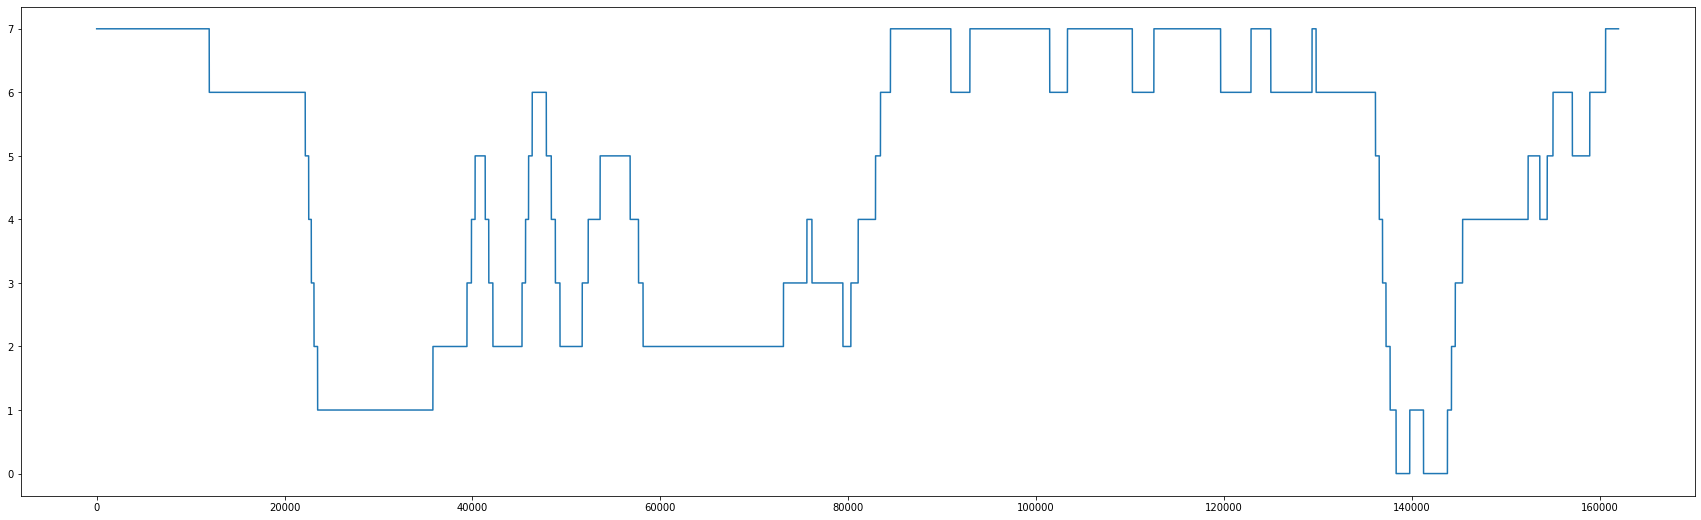

In [39]:
plt.plot(lab_smth)

In [40]:
lab_smth[30000]

1

In [102]:
len(grp[1])

18252

In [81]:
len(grp[0])

18252

In [83]:
len(raster_min)

18252

In [84]:
len(lab_smth)

162002

In [100]:
max(time_min)

89.99944444444444

In [104]:
len(lab_sw)

162000

In [107]:
len(raster_min)

18252

In [115]:
m.floor(162000/18252)

8

In [188]:
for i in range(0,20000):
    if lab_sw[i]==1:
        print(i)

11980


In [189]:
11980/1800

6.655555555555556

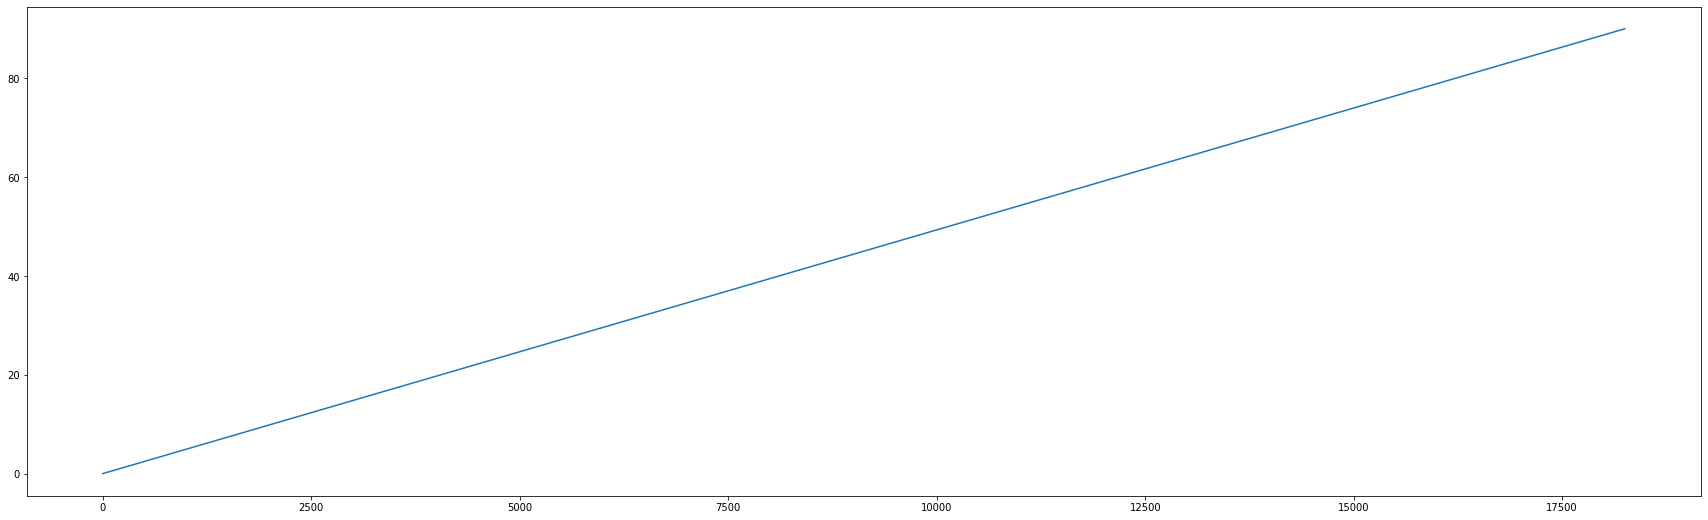

In [130]:
plt.plot(raster_min)

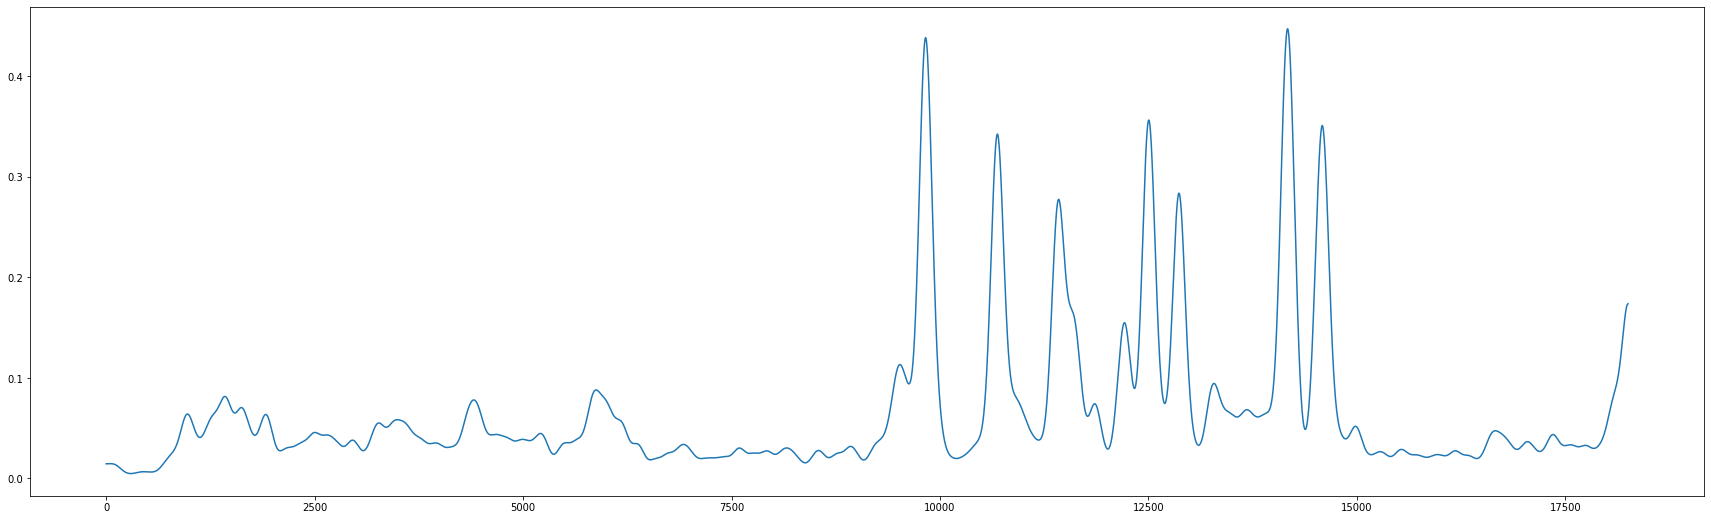

In [131]:
plt.plot(grp[1])

In [137]:
m.floor(11980/(162000/18252))

1349

In [144]:
(m.floor(11980/(162000/18252))/3.38)/60

6.651873767258382

In [153]:
len(time_min)

162000

In [154]:
len(raster_min)

18252

In [160]:
(m.floor(83434/(162000/18252))/3.38)/60

46.35108481262328

In [200]:
max(time_min)

89.99944444444444

In [201]:
max(raster_min)

89.99506903353058

In [210]:
int(y_super_max)

0